# Some fun Sunset and Sunrise DS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [2]:
def prep_data(file_name):
    
    # TODO naming the cols in this way is fragile to changes in filename structure
    df = pd.read_csv(file_name, header=None)
    df_out =  pd.DataFrame(data={file_name.split("/")[-1].split(".")[0]: \
                                 np.reshape(np.transpose(df.values), -1)}).dropna().reset_index(drop=True)
    
    return df_out

In [3]:
df1 = prep_data("../data/lon_sunrise.csv")
df2 = prep_data("../data/lon_sunset.csv")
df3 = prep_data("../data/man_sunrise.csv")
df4 = prep_data("../data/man_sunset.csv")
df5 = prep_data("../data/edi_sunrise.csv")
df6 = prep_data("../data/edi_sunset.csv")

In [4]:
times = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)

In [5]:
times.index = pd.date_range(start="2022-01-01", end="2022-12-31")

In [6]:
times

,lon_sunrise,lon_sunset,man_sunrise,man_sunset,edi_sunrise,edi_sunset
2022-01-01,08:06,16:02,08:25,16:00,08:44,15:49
2022-01-02,08:06,16:03,08:25,16:01,08:43,15:50
2022-01-03,08:06,16:04,08:24,16:03,08:43,15:52
2022-01-04,08:06,16:05,08:24,16:04,08:43,15:53
2022-01-05,08:05,16:07,08:24,16:05,08:42,15:54
...,...,...,...,...,...,...
2022-12-27,08:06,15:57,08:25,15:55,08:44,15:44
2022-12-28,08:06,15:58,08:25,15:56,08:44,15:45
2022-12-29,08:06,15:59,08:25,15:57,08:44,15:46
2022-12-30,08:06,16:00,08:25,15:58,08:44,15:47


In [7]:
# convert to timestamps
for col in times.columns:
    times[col] = pd.to_datetime([str(times.index[0].date()) + "T" + str(times.loc[x, col]) for x,_ in times.iterrows()])


## Sunrise

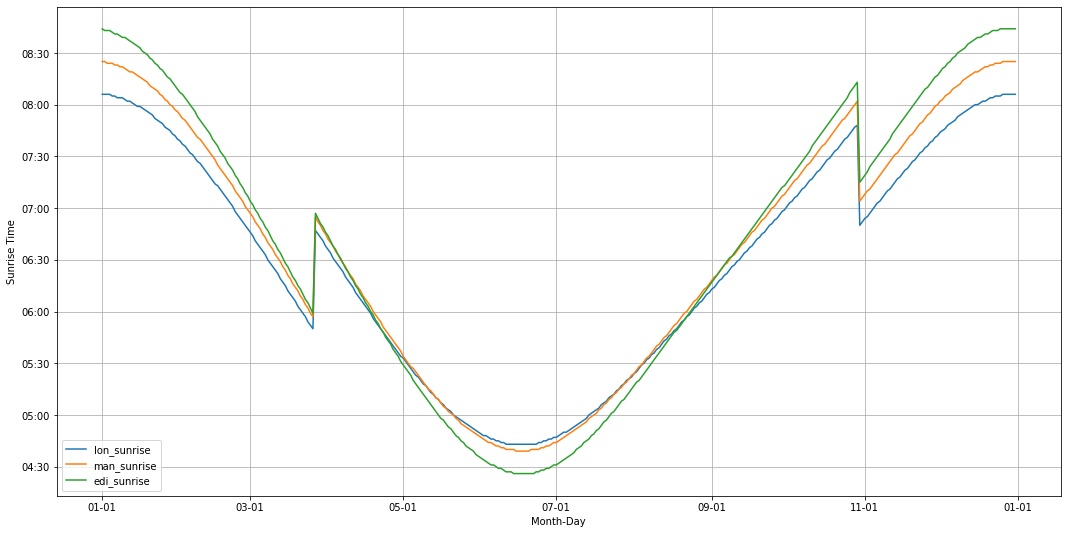

In [9]:
plt.figure(figsize=(18,9))
plt.plot(times["lon_sunrise"], label="lon_sunrise")
plt.plot(times["man_sunrise"], label="man_sunrise")
plt.plot(times["edi_sunrise"], label="edi_sunrise")
plt.axis()
xformatter = mdates.DateFormatter('%m-%d')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
yformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].yaxis.set_major_formatter(yformatter)
plt.ylabel("Sunrise Time")
plt.xlabel("Month-Day")
plt.legend()
plt.grid()
plt.show()

In [11]:
print(f'Spring Sunrise Edi earlier than London:\
      {times["edi_sunrise"][times["edi_sunrise"]<times["lon_sunrise"]].index[0].date()}')
print(f'Autumn Sunrise London earlier than Edi:\
      {times["edi_sunrise"][times["edi_sunrise"]<times["lon_sunrise"]].index[-1].date()}')

Spring Sunrise Edi earlier than London:      2022-04-24
Autumn Sunrise London earlier than Edi:      2022-08-20


## Sunset

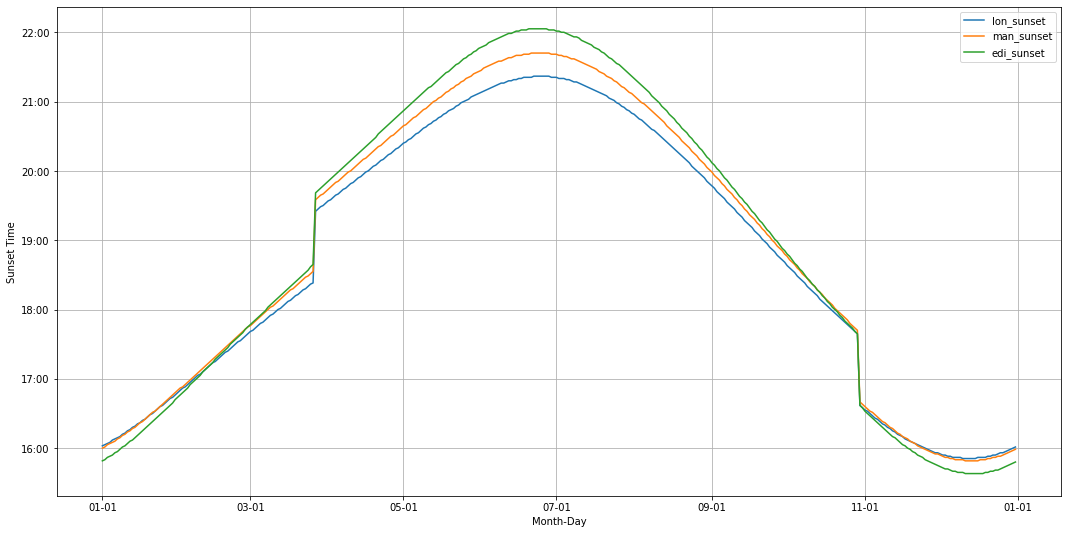

In [12]:
plt.figure(figsize=(18,9))
plt.plot(times["lon_sunset"], label="lon_sunset")
plt.plot(times["man_sunset"], label="man_sunset")
plt.plot(times["edi_sunset"], label="edi_sunset")
plt.axis()
xformatter = mdates.DateFormatter('%m-%d')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
yformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].yaxis.set_major_formatter(yformatter)
plt.ylabel("Sunset Time")
plt.xlabel("Month-Day")
plt.legend()
plt.grid()
plt.show()

In [13]:
print(f'Spring Sunset Edi later than London:\
      {times["edi_sunset"][times["edi_sunset"]>times["lon_sunset"]].index[0].date()}')
print(f'Autumn Sunset London later than Edi:\
      {times["edi_sunset"][times["edi_sunset"]>times["lon_sunset"]].index[-1].date()}')

Spring Sunset Edi later than London:      2022-02-15
Autumn Sunset London later than Edi:      2022-10-27


## Day Length

In [14]:
day_length_lon = times["lon_sunset"] - times["lon_sunrise"]
day_length_man = times["man_sunset"] - times["man_sunrise"]
day_length_edi = times["edi_sunset"] - times["edi_sunrise"]

In [15]:
print("London total daylight")
print(day_length_lon.sum())

print("Manchester total daylight")
print(day_length_man.sum())

print("Edinburgh total daylight")
print(day_length_edi.sum())

London total daylight
186 days 16:05:00
Manchester total daylight
186 days 22:45:00
Edinburgh total daylight
187 days 09:16:00


In [16]:
zero = dt.datetime(2022,1,1)
day_length_edi = [zero + t for t in day_length_edi]
day_length_man = [zero + t for t in day_length_man]
day_length_lon = [zero + t for t in day_length_lon]

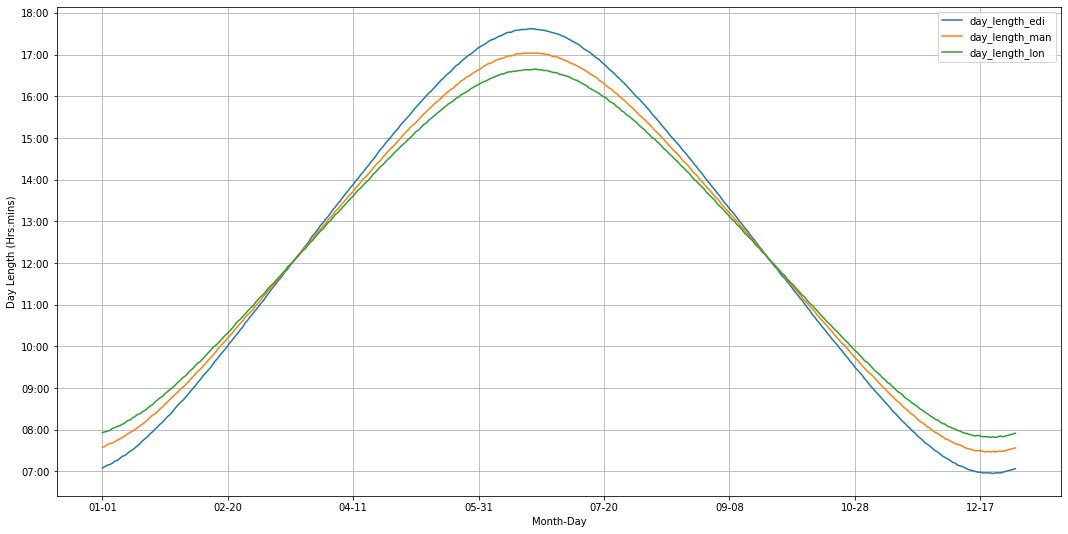

In [17]:
plt.figure(figsize=(18,9))
plt.plot(day_length_edi, label="day_length_edi")
plt.plot(day_length_man, label="day_length_man")
plt.plot(day_length_lon, label="day_length_lon")
plt.axis()
xformatter = mdates.DateFormatter('%m-%d')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
yformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].yaxis.set_major_formatter(yformatter)
plt.ylabel("Day Length (Hrs:mins)")
plt.xlabel("Month-Day")
plt.legend()
plt.grid()
plt.show()

In [18]:
dl = pd.DataFrame(data={"day_length_lon": day_length_lon, "day_length_man": day_length_man,
                       "day_length_edi": day_length_edi}, index=times.index)

In [19]:
print(f'Spring Day Length Edi longer than London:\
      {dl[dl.day_length_edi>dl.day_length_lon].index[0].date()}')
print(f'Autumn Day Length London longer than Edi:\
      {dl.loc[dt.datetime(2022, 6, 1):][dl.day_length_edi<dl.day_length_lon].index[0].date()}')

Spring Day Length Edi longer than London:      2022-03-20
Autumn Day Length London longer than Edi:      2022-09-25


/tmp/ipykernel_19327/3988959865.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  {dl.loc[dt.datetime(2022, 6, 1):][dl.day_length_edi<dl.day_length_lon].index[0].date()}')


## SUMMARY

In [20]:
print("---------------------------------------------------")

print(f'Spring Sunrise Edi earlier than London:\
      {times["edi_sunrise"][times["edi_sunrise"]<times["lon_sunrise"]].index[0].date()}')
print(f'Autumn Sunrise London earlier than Edi:\
      {times["edi_sunrise"][times["edi_sunrise"]<times["lon_sunrise"]].index[-1].date()}')

print("---------------------------------------------------")

print(f'Spring Sunset Edi later than London:\
      {times["edi_sunset"][times["edi_sunset"]>times["lon_sunset"]].index[0].date()}')
print(f'Autumn Sunset London later than Edi:\
      {times["edi_sunset"][times["edi_sunset"]>times["lon_sunset"]].index[-1].date()}')

print("---------------------------------------------------")

print(f'Spring Day Length Edi longer than London:\
      {dl[dl.day_length_edi>dl.day_length_lon].index[0].date()}')
print(f'Autumn Day Length London longer than Edi:\
      {dl.loc[dt.datetime(2022, 6, 1):][dl.day_length_edi<dl.day_length_lon].index[0].date()}')

---------------------------------------------------
Spring Sunrise Edi earlier than London:      2022-04-24
Autumn Sunrise London earlier than Edi:      2022-08-20
---------------------------------------------------
Spring Sunset Edi later than London:      2022-02-15
Autumn Sunset London later than Edi:      2022-10-27
---------------------------------------------------
Spring Day Length Edi longer than London:      2022-03-20
Autumn Day Length London longer than Edi:      2022-09-25


/tmp/ipykernel_19327/2073812894.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  {dl.loc[dt.datetime(2022, 6, 1):][dl.day_length_edi<dl.day_length_lon].index[0].date()}')
